This Notebook is for part 1 of the [Working with Geospatial Data in Python](https://medium.com/p/453c97daebc5) on Towards Data Science 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import rioxarray

terrain_file = 'data/rasters_CA18Thompson/output_be.tif'
terrain = rioxarray.open_rasterio(terrain_file)

surface_file = 'data/rasters_CA18Thompson/output_hh.tif'
surface = rioxarray.open_rasterio(surface_file)

In [3]:
surface

<xarray.DataArray (band: 1, y: 3003, x: 3371)>
[10123113 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2.738e+05 2.738e+05 ... 2.755e+05 2.755e+05
  * y            (y) float64 4.176e+06 4.176e+06 ... 4.175e+06 4.175e+06
    spatial_ref  int64 0
Attributes:
    _FillValue:    1.701410009187828e+38
    scale_factor:  1.0
    add_offset:    0.0

In [4]:
surface.rio.nodata

1.70141e+38

In [5]:
# Show CRS
print(surface.rio.crs)

EPSG:6340


In [6]:
surface.min()

<xarray.DataArray ()>
array(1816.7574, dtype=float32)
Coordinates:
    spatial_ref  int64 0

In [7]:
terrain.min()

<xarray.DataArray ()>
array(1819.0115, dtype=float32)
Coordinates:
    spatial_ref  int64 0

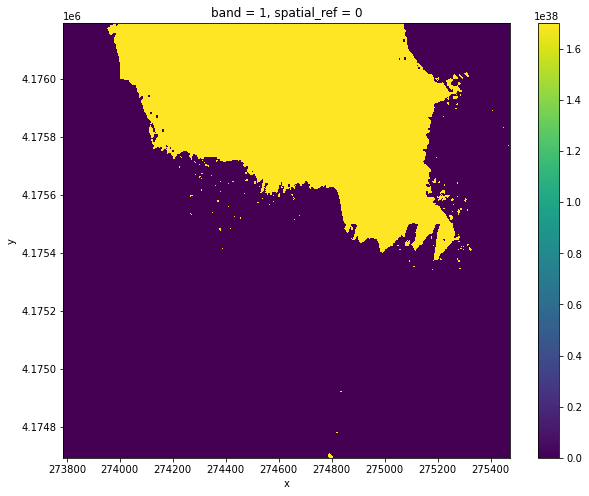

In [8]:
plt.figure(figsize=(10,8))
surface.plot()

In [9]:
print(surface.rio.nodata)

1.70141e+38


In [10]:
# reload the surface raster masking nan values
surface = rioxarray.open_rasterio(surface_file, masked=True)

Text(0.5, 1.0, 'Digital Surface Model')

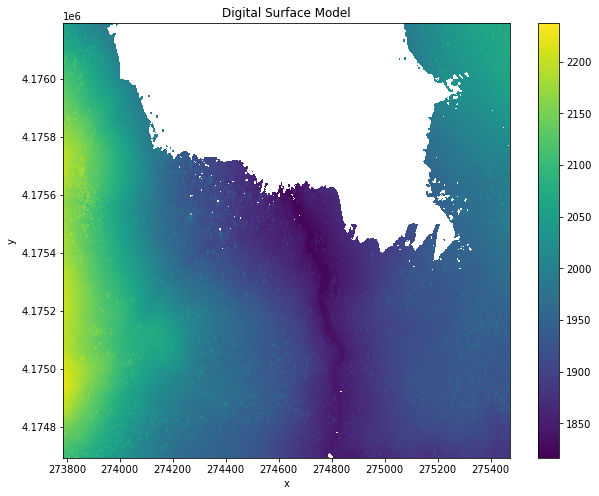

In [11]:
# plot surface raster
plt.figure(figsize=(10,8))
surface.plot()
plt.title('Digital Surface Model')

Text(0.5, 1.0, 'Digital Terrain Model')

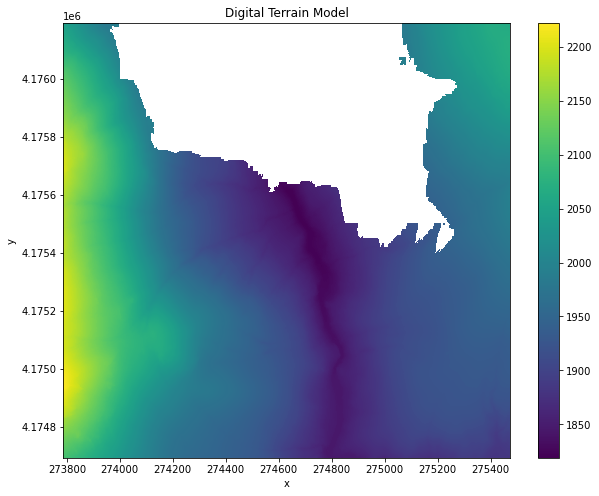

In [12]:
# reload the terrain raster masking nan values
terrain = rioxarray.open_rasterio(terrain_file, masked=True)

# plot terrain raster
plt.figure(figsize=(10,8))
terrain.plot()
plt.title('Digital Terrain Model')

Text(0.5, 1.0, 'Canopy Height Model')

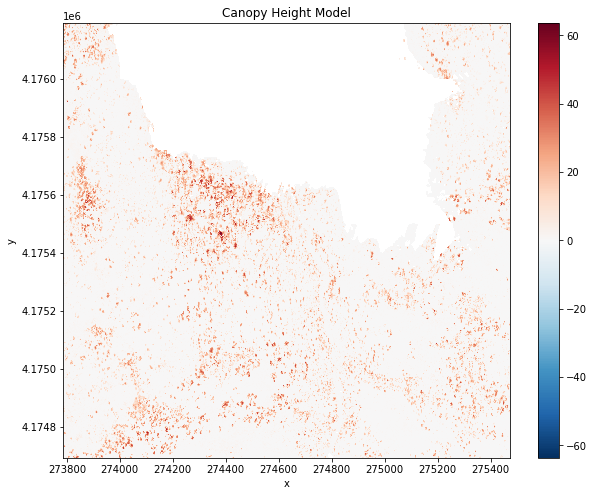

In [13]:
# calculate canopy height model
canopy = surface - terrain

# plot surface raster
plt.figure(figsize=(10,8))
canopy.plot()
plt.title('Canopy Height Model')

In [14]:
from pyproj import CRS
epsg = canopy.rio.crs.to_epsg()
crs = CRS(epsg)
crs

<Projected CRS: EPSG:6340>
Name: NAD83(2011) / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United States (USA) - between 120°W and 114°W onshore and offshore - California, Idaho, Nevada, Oregon, Washington.
- bounds: (-120.0, 30.88, -114.0, 49.01)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich